In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import statsmodels.api as sm
import scipy.stats as ss
%matplotlib inline
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [4]:
hd= pd.read_csv('housingdata.csv')
hd.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [5]:
hd.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
hd.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

Text(0.5, 1.0, 'Number of Rooms Vs Price')

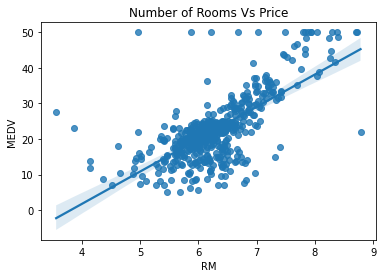

In [7]:
sns.regplot(x="RM", y="MEDV", data=hd, fit_reg=True)
plt.title('Number of Rooms Vs Price')

Text(0.5, 1.0, 'Number of Rooms')

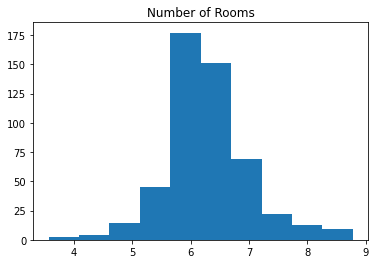

In [142]:
plt.hist(hd.RM)
plt.title('Number of Rooms')

(array([  2.,   2.,   4.,  12.,  30., 165., 179.,  76.,  23.,  13.]),
 array([1.2700414 , 1.3602849 , 1.4505284 , 1.54077191, 1.63101541,
        1.72125891, 1.81150241, 1.90174591, 1.99198941, 2.08223291,
        2.17247641]),
 <BarContainer object of 10 artists>)

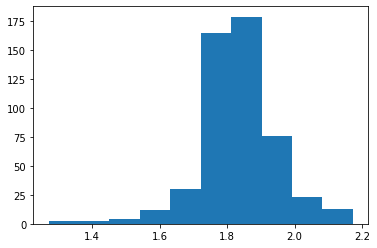

In [143]:
plt.hist(np.log(hd.RM))

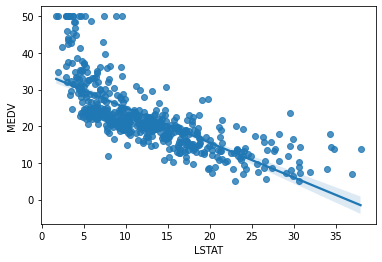

In [144]:
sns.regplot(y='MEDV', x='LSTAT',data=hd, fit_reg=True)
plt.show()

In [2]:
hd_selected_var=hd.iloc[:,[0,4,5,7,10,12,13]]

NameError: name 'hd' is not defined

In [1]:
hd_selected_var.head()

NameError: name 'hd_selected_var' is not defined

In [147]:
hd_selected_var['CRIM']=np.log(hd_selected_var.CRIM)

C:\Users\calwy\AppData\Local\Temp/ipykernel_30572/3200861688.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hd_selected_var['CRIM']=np.log(hd_selected_var.CRIM)


In [151]:
hd_selected_var.corr()

,CRIM,NOX,RM,DIS,PTRATIO,LSTAT,MEDV
CRIM,1.000000,0.420972,-0.219247,-0.379670,0.289946,0.455621,-0.388305
NOX,0.420972,1.000000,-0.302188,-0.769230,0.188933,0.590879,-0.427321
RM,-0.219247,-0.302188,1.000000,0.205246,-0.355501,-0.613808,0.695360
DIS,-0.379670,-0.769230,0.205246,1.000000,-0.232471,-0.496996,0.249929
PTRATIO,0.289946,0.188933,-0.355501,-0.232471,1.000000,0.374044,-0.507787
LSTAT,0.455621,0.590879,-0.613808,-0.496996,0.374044,1.000000,-0.737663
MEDV,-0.388305,-0.427321,0.695360,0.249929,-0.507787,-0.737663,1.000000


In [153]:
model=ols('MEDV~CRIM+NOX+RM+DIS+PTRATIO+LSTAT', hd_selected_var).fit()

In [156]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.708
Method:                 Least Squares   F-statistic:                     205.0
Date:                Fri, 01 Apr 2022   Prob (F-statistic):          3.53e-131
Time:                        15:26:27   Log-Likelihood:                -1525.8
No. Observations:                 506   AIC:                             3066.
Df Residuals:                     499   BIC:                             3095.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     35.5455      4.663      7.622      0.0

In [157]:
projected_price=model.fittedvalues

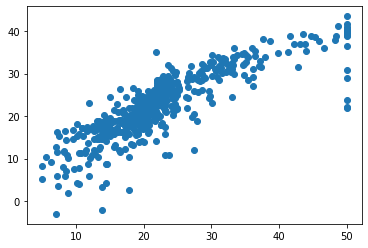

In [158]:
plt.scatter(hd_selected_var.MEDV, projected_price)

In [163]:
error=np.sqrt(mean_squared_error(hd_selected_var.MEDV,projected_price))
error

4.935935603414151

In [168]:
x=hd_selected_var.drop('MEDV', axis=1)
y=hd_selected_var['MEDV']

In [179]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=3)

In [174]:
LinR=LinearRegression()
LinR.fit(x_train,y_train)

LinearRegression()

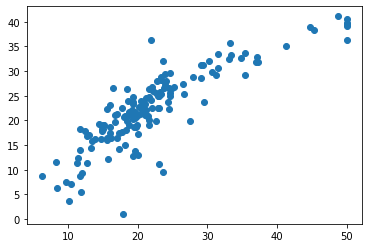

In [180]:
predicted_y=LinR.predict(x_test)
plt.scatter(y_test,predicted_y)

In [182]:
np.sqrt(mean_squared_error(y_test,predicted_y))

4.662823091704613

In [192]:
river1=hd[hd['CHAS']==1]['MEDV'].to_numpy()
river0=hd[hd['CHAS']==0]['MEDV'].to_numpy()
river2=hd['MEDV'].to_numpy()
rh1=round(river1.mean(),2)
rh0=round(river0.mean(),2)
rh2=round(river2.mean(),2)
diff=round(rh1-rh2,2)
print(str(rh1)+' Mean value of Tracts near CharlesRiver')
print(str(rh0)+'  Mean value of tracts that do not border Charles River')
print(str(rh2)+' Mean of all houses')
print(str(diff)+' Difference between houses that border river and those that dont')

28.44 Mean value of Tracts near CharlesRiver
22.09  Mean value of tracts that do not border Charles River
22.53 Mean of all houses
5.91 Difference between houses that border river and those that dont
